In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
df = pd.read_csv('dermatology.csv')

In [29]:
novos_nomes = {
    'erythema': 'eritema',
    'scaling': 'descam',
    'definite_borders': 'bordas_def',
    'itching': 'prurido',
    'koebner_phenomenon': 'koebner',
    'polygonal_papules': 'pap_polig',
    'follicular_papules': 'pap_folic',
    'oral_mucosal_involvement': 'mucosa_oral',
    'knee_and_elbow_involvement': 'joelho_cotov',
    'scalp_involvement': 'couro_cab',
    'family_history': 'hist_fam',
    'melanin_incontinence': 'melanina_inc',
    'eosinophils_infiltrate': 'eos_infil',
    'PNL_infiltrate': 'pnl_infil',
    'fibrosis_papillary_dermis': 'fibrose_derme',
    'exocytosis': 'exocitose',
    'acanthosis': 'acantose',
    'hyperkeratosis': 'hiperker',
    'parakeratosis': 'paraker',
    'clubbing_rete_ridges': 'cristas_fund',
    'elongation_rete_ridges': 'cristas_along',
    'thinning_suprapapillary_epidermis': 'epid_fina',
    'spongiform_pustule': 'pustula_spong',
    'munro_microabcess': 'microabs_munro',
    'focal_hypergranulosis': 'hipergran_focal',
    'disappearance_granular_layer': 'cam_gran_desap',
    'vacuolisation_damage_basal_layer': 'vacuol_basal',
    'spongiosis': 'espongiose',
    'saw_tooth_appearance_retes': 'rete_dente_serra',
    'follicular_horn_plug': 'tampao_folic',
    'perifollicular_parakeratosis': 'paraker_folic',
    'inflammatory_mononuclear_infiltrate': 'infil_mononuc',
    'band_like_infiltrate': 'infil_faixa',
    'age': 'idade',
    'class': 'classe'
}

df = df.rename(columns=novos_nomes)
df

,eritema,descam,bordas_def,prurido,koebner,pap_polig,pap_folic,mucosa_oral,joelho_cotov,couro_cab,...,cam_gran_desap,vacuol_basal,espongiose,rete_dente_serra,tampao_folic,paraker_folic,infil_mononuc,infil_faixa,idade,classe
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [30]:
X = df.drop(columns=['classe'])
y = df['classe']

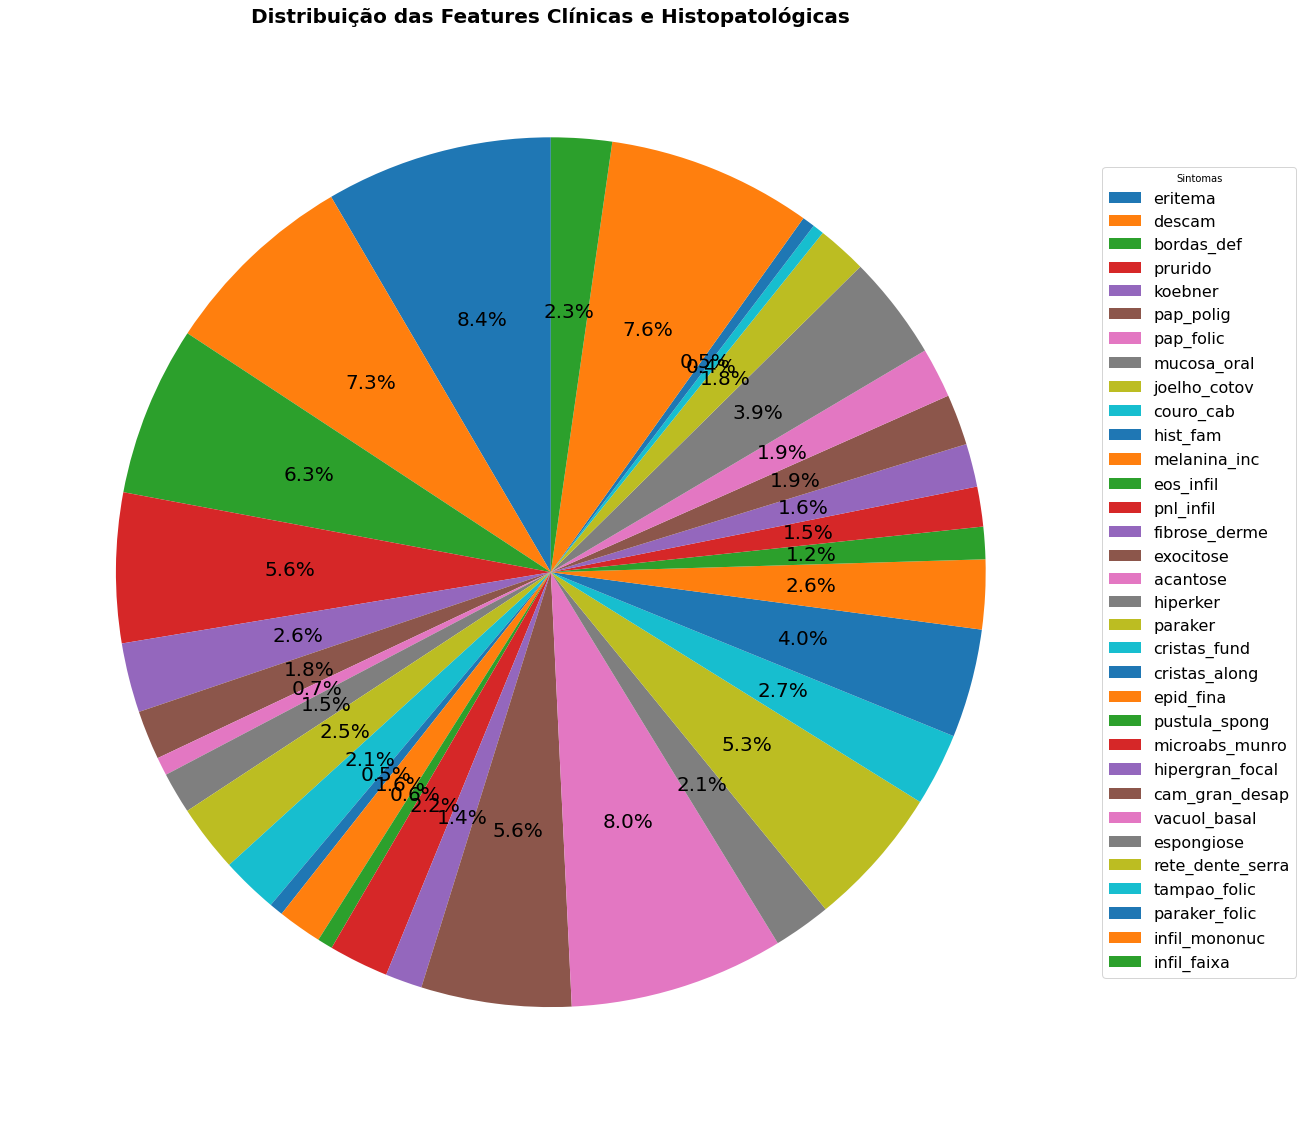

In [31]:
feature = X.drop(columns=['idade']).sum()

plt.figure(figsize=(20, 20))
wedges, texts, autotexts = plt.pie(
    feature,
    autopct='%1.1f%%',
    startangle=90
)

for autotext in autotexts:
    autotext.set_fontsize(20)

plt.title('Distribuição das Features Clínicas e Histopatológicas', fontsize=20, fontweight='bold')
plt.legend(feature.index, title='Sintomas', fontsize=16, loc='center left', bbox_to_anchor=(1,0,0.5,1), frameon=True)
plt.show()


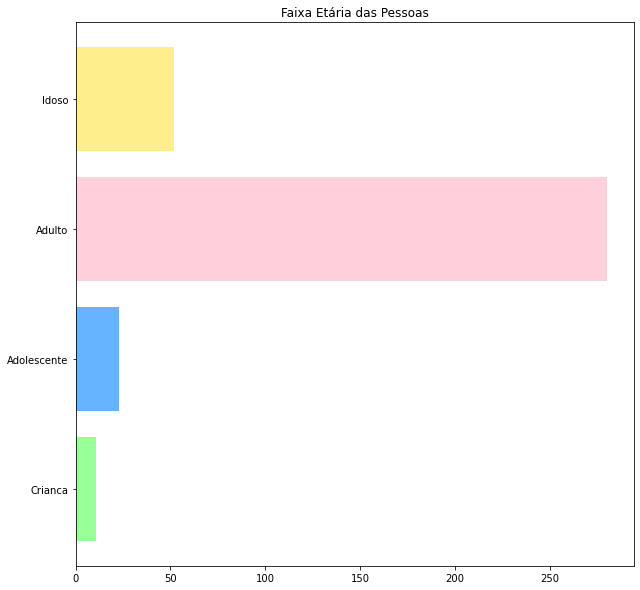

In [47]:
crianca = 0
adolescente = 0
adulto = 0
idoso = 0

for idade in df['idade']:
    if idade <= '12' :
        crianca +=1
    elif idade > '12' and idade <= '18':
        adolescente +=1
    elif idade > '18' and idade < '60':
        adulto +=1
    else:
        idoso += 1
        
faixa = [crianca, adolescente, adulto, idoso]
etaria = ['Crianca', 'Adolescente', 'Adulto', 'Idoso']
plt.figure(figsize=(10, 10))
plt.barh(etaria, faixa, color=['#99FF99', '#66B3FF', '#FFD1DC', '#FFEE8C'])
plt.title('Faixa Etária das Pessoas')
plt.show()

In [58]:
M_crianca = 0
M_adolescente = 0
M_adulto = 0
M_idoso = 0

def faixa(idade):
    try:
        idade = int(idade)
        if idade <= 12 :
            return 'Criança'
        elif idade > 12 and idade <= 18:
            return 'Adolescente'
        elif idade > 18 and idade < 60:
            return 'Adulto'
        else:
            return 'Idoso'
    except:
        return 'null'

    
df['FaixaEtaria'] = df['idade'].apply(faixa)



In [61]:
df.groupby('FaixaEtaria')['classe'].mean()

FaixaEtaria
Adolescente    3.652174
Adulto         2.582143
Criança        4.708333
Idoso          2.451613
null           3.750000
Name: classe, dtype: float64

In [ ]:
faixa = [crianca, adolescente, adulto, idoso]
etaria = ['Crianca', 'Adolescente', 'Adulto', 'Idoso']
plt.figure(figsize=(10, 10))
plt.barh(etaria, faixa, color=['#99FF99', '#66B3FF', '#FFD1DC', '#FFEE8C'])
plt.title('Faixa Etária das Pessoas')
plt.show()